# Распознавание рукописных цифр из набора данных MNIST с помощью сверточных нейронных сетей

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras import layers
from keras import models
%matplotlib inline 

**Загружаем данные**

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Правильный ответ:  5


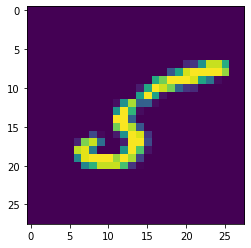

In [ ]:
n = 11
plt.imshow(x_train_org[n, :, :])
print("Правильный ответ: ", y_train_org[n])
plt.show()

**Преобразование размерности данных в наборе**  


In [ ]:
print("Тренировочные данные:", x_train_org.shape)
print("Тренировочные метки:", y_train_org.shape)
print("Тестовые данные:", x_test_org.shape)
print("Тестовые метки:", y_test_org.shape)

Тренировочные данные: (60000, 28, 28)
Тренировочные метки: (60000,)
Тестовые данные: (10000, 28, 28)
Тестовые метки: (10000,)


In [ ]:
train_images = x_train_org.reshape((60000, 28, 28, 1))
test_images = x_test_org.reshape((10000, 28, 28, 1))

**Нормализация данных**

In [ ]:
train_images = train_images.astype('float32')
train_images = train_images / 255

test_images = test_images.astype('float32')
test_images = test_images / 255

**Преобразуем метки в формат one hot encoding**

In [ ]:
train_labels = utils.to_categorical(y_train_org)
test_labels = utils.to_categorical(y_test_org)

**Создаем нейронную сеть**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

**Проверим архитектуру сети**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

**Компилируем нейронную сеть**

In [ ]:
model.compile(optimizer='rmsprop', # градиентный спуск с импульсом
              loss='categorical_crossentropy', # Многоклассовая, однозначная классификация
              metrics=['accuracy'])

**Обучаем нейронную сеть**

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 18s 13ms/step - loss: 0.2020 - accuracy: 0.9383 - val_loss: 0.0750 - val_accuracy: 0.9782
Epoch 2/5
750/750 [==============================] - 10s 13ms/step - loss: 0.0518 - accuracy: 0.9839 - val_loss: 0.0439 - val_accuracy: 0.9866
Epoch 3/5
750/750 [==============================] - 9s 12ms/step - loss: 0.0352 - accuracy: 0.9886 - val_loss: 0.0398 - val_accuracy: 0.9889
Epoch 4/5
750/750 [==============================] - 10s 13ms/step - loss: 0.0266 - accuracy: 0.9916 - val_loss: 0.0348 - val_accuracy: 0.9906
Epoch 5/5
750/750 [==============================] - 10s 13ms/step - loss: 0.0200 - accuracy: 0.9940 - val_loss: 0.0418 - val_accuracy: 0.9891


**Проверяем работу ИНС**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 5ms/step - loss: 0.0324 - accuracy: 0.9904


In [ ]:
test_acc

0.9904000163078308

In [ ]:
model.save("mnist_dense.h6")


INFO:tensorflow:Assets written to: mnist_dense.h6/assets


In [ ]:
files.upload()

Saving 6.png to 6 (1).png


{'6.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01*\x00\x00\x014\x08\x02\x00\x00\x00\x14\x84\xe9\x93\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00\x0c?IDATx^\xed\xdd-t\xdb\xca\x16\x86\xe1\x03\x03\r\x03\x03\x03\x0b\x03\x0b\x03\x0b\x0b\x0b\x0b\r\xcd\n\r\r\x0b\r\x0b\x0b\r\r\r\r\x03\r\x0b\r\x03{v\xabYnbK[\x96,\xe9\x9b\x9f\xf7A\xf7\x9e\xa5\xa4\x89\x96^\xcfhFv\xfe\xfb\r@\x84\xfc\x00\x19\xf2\x03d\xc8\x0f\x90!?@\x86\xfc\x00\x19\xf2\x03d\xc8\x0f\x90!?@\x86\xfc\x00\x19\xf2\x03d\xc8\x0f\x90!?@\x86\xfc\x00\x19\xf2\x03d\xc8\x0f\x90!?@\x86\xfc\x00\x19\xf2\x03d\xc8\x0f\x90!?@\x86\xfc\x00\x19\xf2\x03d\xc8\x0f\x90!?@\x86\xfc\x00\x19\xf2\x03d\xc8\x0f\x90!?@\x86\xfc\x00\x19\xf2\x03d\xc8\x0f\x90!?@\x86\xfc\x00\x19\xf2\x03d\xc8\x0f\x90!?@\x86\xfc\x00\x19\xf2\x03d\xc8\x0f\x90!?@\x86\xfc\x00\x19\xf2\x03d\xc8\x0f\x90!?@\x86\xfc\x00\x19\xf2\x03d\xc8\x0f\x90!?@\x86\xfc\x00\x19\xf2\x03d\xc8

In [ ]:
!ls

'6 (1).png'   6.png   mnist_dense.h6   sample_data


In [ ]:
img_path = '6.png'
img = image.load_img(img_path, target_size=(28, 28, 1), color_mode = "grayscale")

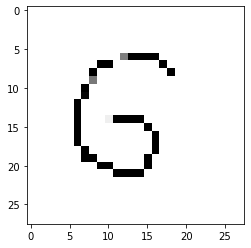

In [ ]:
plt.imshow(img.convert('RGBA'))
plt.show()

In [ ]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape((1, 28, 28, 1) 
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

In [ ]:
prediction = model.predict(x)

In [ ]:
prediction

array([[3.8463067e-02, 2.3808902e-06, 4.1616008e-02, 1.9809275e-04,
        1.2702343e-08, 9.7022921e-02, 4.5903614e-01, 1.2219163e-04,
        3.5832626e-01, 5.2129822e-03]], dtype=float32)

In [ ]:
print(np.argmax(prediction))

6
